<a href="https://colab.research.google.com/github/escapingLife/mashinePrograming/blob/master/7%EC%A3%BC%EC%B0%A8/CNN_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

# 1. 데이터 불러오기
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [9]:
# 1. 데이터 불러오기
digits = datasets.load_digits()
X = digits.images  # (1797, 8, 8)
y = digits.target

In [10]:
# 2. 데이터 차원 변환 (CNN 입력 형식: (샘플, 높이, 너비, 채널))
X = X.reshape(-1, 8, 8, 1)

In [11]:
# 3. 정규화 (0~1)
X = X / 16.0  # digits 데이터는 원래 픽셀 값이 0~16 범위

In [12]:
# 4. One-hot 인코딩
y_categorical = to_categorical(y, num_classes=10)

In [13]:
# 5. 학습/테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(
    X, y_categorical, test_size=0.3, random_state=42
)

In [14]:
# 6. CNN 모델 정의
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(8,8,1), padding='same'),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 0~9 숫자 분류
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
# 7. 모델 컴파일
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # 분류 문제에서는 mse 대신 crossentropy
    metrics=['accuracy']
)

In [16]:
# 8. 학습
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=32,
    verbose=1
)

Epoch 1/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 98ms/step - accuracy: 0.1233 - loss: 2.2881 - val_accuracy: 0.3574 - val_loss: 2.1603
Epoch 2/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2658 - loss: 2.1460 - val_accuracy: 0.7778 - val_loss: 1.7258
Epoch 3/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4334 - loss: 1.7432 - val_accuracy: 0.8407 - val_loss: 1.0706
Epoch 4/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5962 - loss: 1.2768 - val_accuracy: 0.9019 - val_loss: 0.6458
Epoch 5/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7080 - loss: 0.9185 - val_accuracy: 0.8944 - val_loss: 0.4206
Epoch 6/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7365 - loss: 0.8006 - val_accuracy: 0.9259 - val_loss: 0.3435
Epoch 7/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8132 - loss: 0.5724 - val_accuracy: 0.9370 - val_loss: 0.2595
Epoch 8/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8459 - loss: 0.5210 - val_accuracy: 0.9481 - val_los

In [17]:
# 9. 평가
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"CNN 모델 테스트 정확도: {acc:.4f}")

CNN 모델 테스트 정확도: 0.9907


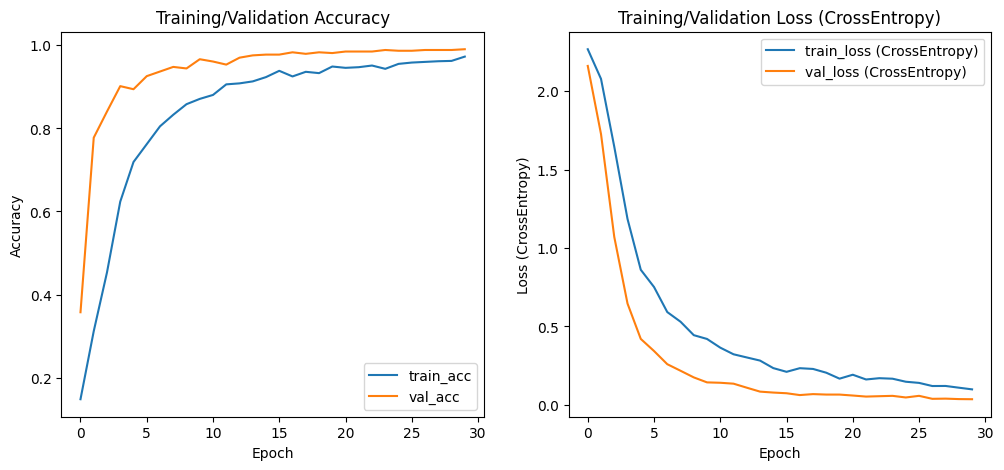

In [18]:
# 10. 학습 곡선 시각화
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training/Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train_loss (CrossEntropy)')
plt.plot(history.history['val_loss'], label='val_loss (CrossEntropy)')
plt.xlabel("Epoch")
plt.ylabel("Loss (CrossEntropy)")
plt.legend()
plt.title("Training/Validation Loss (CrossEntropy)")

plt.show()